In [3]:
#load libraries
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import sklearn.discriminant_analysis
import sklearn.manifold 
import librosa
import librosa.display
import numpy
import random
import pandas
import seaborn
import json
import operator
import joblib
import pickle
from collections import Counter

c:\users\aless\appdata\local\programs\python\python37\lib\site-packages\librosa\core\audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


{'Simon & Garfunkel': 0.141, "Guns N' Roses": 0.074, 'Queen': 0.118, 'The Beatles': 0.119, 'Michael Jackson': 0.116, 'Passenger': 0.115, 'Ed Sheeran': 0.102, 'Pink Floyd': 0.086, 'Coldplay': 0.045, 'Bruce Springsteen': 0.085}


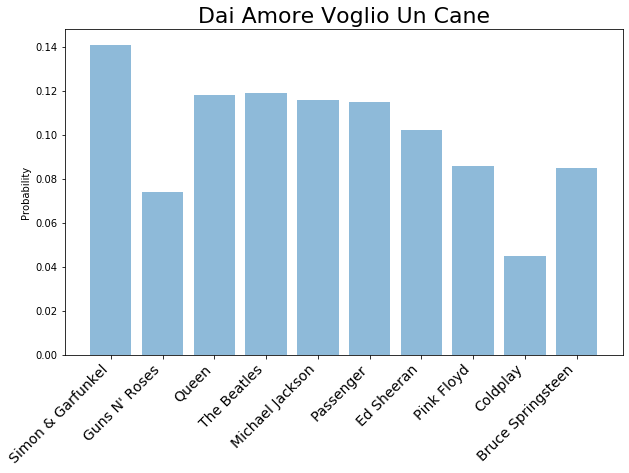

In [13]:
#### select the path to the song and sampling rate (raccomaded sr=10000)
sr=10000
song="Dai Amore Voglio Un Cane.mp3"




title=song.split(".")[0]
a = librosa.load(song,sr=sr)[0]
mfcc = librosa.feature.mfcc(a, sr=sr,n_mfcc=20)
scaler = sklearn.preprocessing.StandardScaler()
mfcc = scaler.fit_transform(mfcc.T)
model = joblib.load('GMM.joblib')
artistlist=['Bruce Springsteen','Coldplay','Ed Sheeran', "Guns N' Roses"
            , 'Michael Jackson', 'Passenger', 'Pink Floyd', 'Queen', 'Simon & Garfunkel' , 'The Beatles']


prediction=[]
for t in mfcc:
    score={}
    for artist in artistlist:
        artistmodel = model[artist]
        score[artist]= artistmodel.score(numpy.reshape(t,(1,-1)))
    pred = max(score, key=lambda key: score[key])
    prediction.append(pred)
    
R=dict((x,prediction.count(x)) for x in set(prediction))
for key,value in R.items():
    R[key]=round(value/mfcc.shape[0],3)
print(R)

plt.figure(figsize=(10, 6))
pos = numpy.arange(10)
plt.bar(pos, R.values(), align='center', alpha=0.5)
plt.xticks(pos, R.keys())
plt.xticks(rotation=45,fontsize=14,ha="right")
plt.title(title,fontsize=22)
plt.ylabel("Probability")
plt.show()